In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_excel('iris.xls')

In [ ]:
data.shape

(150, 5)

In [ ]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
data.isna().sum()

,0
SL,7
SW,6
PL,6
PW,0
Classification,0


In [ ]:
data['SL'] = data['SL'].fillna(data['SL'].mean())
data['SW'] = data['SW'].fillna(data['SW'].mean())
data['PL'] = data['PL'].fillna(data['PL'].mean())

In [ ]:
data.isna().sum()

,0
SL,0
SW,0
PL,0
PW,0
Classification,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
data['Classification'] = le.fit_transform(data['Classification'])

In [ ]:
data

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.40000,0.2,0
1,4.900000,3.0,1.40000,0.2,0
2,5.855944,3.2,1.30000,0.2,0
3,4.600000,3.1,1.50000,0.2,0
4,5.000000,3.6,1.40000,0.2,0
...,...,...,...,...,...
145,6.700000,3.0,5.20000,2.3,2
146,6.300000,2.5,5.00000,1.9,2
147,6.500000,3.0,3.75625,2.0,2
148,6.200000,3.4,5.40000,2.3,2


In [ ]:
x = data.drop('Classification',axis=1)
y = data['Classification']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()

In [ ]:
logit_model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred = logit_model.predict(X_test)

In [ ]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [ ]:
y_test

,Classification
73,1
18,0
118,2
78,1
76,1
31,0
64,1
141,2
68,1
82,1


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
print('Accuracy is', accuracy_score(y_test, y_pred))

Accuracy is 0.9666666666666667


#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3,15)
for k in neighbors:
  k_model = KNeighborsClassifier(n_neighbors=k,metric='minkowski')
  k_model.fit(X_train,y_train)
  y_pred = k_model.predict(X_test)
  acc = accuracy_score(y_test,y_pred)
  metric_k.append(acc)

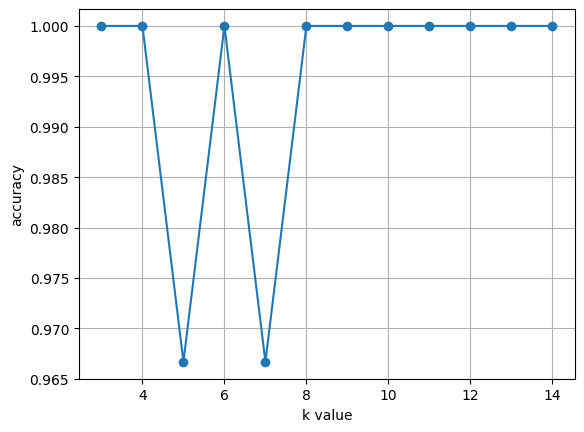

In [ ]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [ ]:
k_model = KNeighborsClassifier(n_neighbors=10,metric='minkowski')
k_model.fit(X_train,y_train)
y_pred = k_model.predict(X_test)
acc = accuracy_score(y_test,y_pred)

In [ ]:
print(acc)


1.0


SVM

In [ ]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train,y_train)
y_pred = svm_model.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print(acc)

0.9666666666666667


In [ ]:
from sklearn.svm import SVC
svm_model = SVC(kernel = 'linear')
svm_model.fit(X_train,y_train)
y_pred = svm_model.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print(acc)

0.9666666666666667


#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state = 42)
dt_model.fit(X_train,y_train)
y_pred = dt_model.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print(acc)

1.0


#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print(acc)

1.0


In [ ]:
# KNN, Decision tree and Random forest algorithms for the Iris dataset give 100% accuracy. So, these three algorithms are better model for this dataset